# Let's build Hartree-Fock part 2: orthogonalization procedures

This tutorial covers topics from sections 3.4.2 and 3.4.5 as well as of pages 173-174 from the *Modern Quantum Chemistry* by Szabo and Ostlund.

### From the Schrödinger equation to the Hartree-Fock equations

Let's have a look at the many-electron Schrödinger equation we are eventually trying to solve:

$$\hat{H}_\text{elec} = -\frac{1}{2} \sum_{i=1}^N \nabla_i^2-\sum_{i=1}^N \sum_{A=1}^M  \frac{Z_A}{r_{iA}}+ \sum_{i=1}^N \sum_{j>i}^N \frac{1}{r_{ij}}.$$

In the Hartree-Fock theory, we approximate the exact wave function using only a single Slater determinant:

$$
\Psi(\mathbf{r}_1, \mathbf{r}_2, \ldots, \mathbf{r}_N) = \frac{1}{\sqrt{N!}}
\begin{vmatrix}
\phi_1(\mathbf{r}_1) & \phi_2(\mathbf{r}_1) & \cdots & \phi_N(\mathbf{r}_1) \\
\phi_1(\mathbf{r}_2) & \phi_2(\mathbf{r}_2) & \cdots & \phi_N(\mathbf{r}_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_1(\mathbf{r}_N) & \phi_2(\mathbf{r}_N) & \cdots & \phi_N(\mathbf{r}_N)
\end{vmatrix}
$$

A Slater determinant consists of one-electron wave functions $\phi_i$, called orbitals. It is constructed in a product form, meaning that the orbitals are independent of each other and interact only in an average manner via the Coulomb term. The determinant structure assures the product wave function is correctly antisymmetric.

When we minimize the expectation value of the Hamiltonian using a single Slater determinant, we obtain a set of equations for each orbital, called the Hartree-Fock equations:

$$\hat{F} \phi_i(\mathbf{r}) = \epsilon_i \phi_i(\mathbf{r})$$

where $\hat{F}$ is the Fock operator,

$$\hat{F}(\mathbf{r}) = -\frac{1}{2}\nabla^2 + V_{\text{ext}}(\mathbf{r}) + \int \frac{\rho(\mathbf{r'})}{|\mathbf{r} - \mathbf{r'}|}d\mathbf{r'} - \sum_{j} \left(\hat{J}_j + \hat{K}_j\right)$$

* The first term is the kinetic energy of the orbital
$V_{\text{ext}}$ 
is the potential energy due to external fields, such as the attraction from nuclei.
* The third term is the classical Coulomb repulsion integral
* 
$\hat{J}_j $
and 
$ \hat{K}_j$ 
are the Coulomb and exchange operators, respectively, accounting for electron-electron repulsion and the antisymmetry of the wave function.


### From the Hartree-Fock equations to the Roothan-Hall equations

The next question is: how do we actually solve the Hartree-Fock equations? The Couloumb and exchange operators are especially tricky, since they include the electron-electron interaction and depend on all the other orbitals. A common approach is to expand the orbtails on a finite basis, resulting in the so-called Roothan-Hall equations:

$$\mathbf{F}\mathbf{C} = \mathbf{S}\mathbf{C}\mathbf{\epsilon}$$

here 
* $\mathbf{C}$ is the matrix of molecular orbital coefficients. Each column corresponds to a molecular orbital, expressed as a linear combination of the basis set functions
* $\mathbf{S}$ is the overlap matrix, each element $S_{\mu\nu}$ contains the overlap integrals between the basis functions $\mu$ and $\nu$
* $\mathbf{\epsilon}$ is a diagonal matrix of orbital energies, each element corresponding to the energy of a molecular orbital
* $\mathbf{F}$ is the so-called Fock matrix,

$$F_{\mu\nu} = H_{\mu\nu}^{\text{core}} + \sum_{\lambda\sigma}D_{\lambda\sigma}\left( 2(\mu\nu|\lambda\sigma) - (\mu\lambda|\nu\sigma) \right)$$

where $\mathbf{D}$ is the so-called density matrix, describing the population of each orbital in the system.

The core Hamiltonian consists of the one-electron components, i.e. the kinetic and electron-nucleus interaction terms. The latter term is the Coulomb and exchange interaction between the electrons. 

The above equation is close to an eigenvalue problem: the only difference is the overlap matrix, due to the basis functions not being orthogonal. If there were no overlap between the basis functions, the overlap matrix would reduce to just an identity matrix. So, to get rid of this overlap we need to orthogonalize the basis set. There are a couple of options to achieve this.

#### An example case

Let's look at a simple case study: two non-orthogonal vectors $\vec{v}_1$ and $\vec{v}_2$ on a plane. These two vectors are not parallel and, hence, span the whole plane: we can write any vector on the plane as a linear combination of these two vectors. Suppose that we wish to find an orthogonal basis based on these two vectors. 

#### The Gram-Schmidt procedure

We can start by choosing vector $\vec{v}_1$ as a basis vector. If we then remove the projection of $\vec{v}_2$ on $\vec{v}_1$ from $\vec{v}_2$, we are left with two orthogonal vectors: 

$$\vec{v}_2^\text{new} = \vec{v}_2-\text{proj}_{\vec{v}_1}{\left(\vec{v}_2\right)}$$

#### The symmetric procedure

Compute an overlap matrix $S$ with $S_{ij} = \langle \mathbf{v}_i |  \mathbf{v}_j \rangle$, symmetric orthogonalization proceeds as follows:
1. Compute the eigenvalue decomposition of $S: S = UsU^T$, where $s$ is a diagonal matrix of eigenvalues, and $U$ contains the corresponding eigenvectors.
2. Construct a transformation matrix $X = S^{-1/2} = Us^{-1/2}U^T$ and apply it to the non-orthogonal vectors.

#### The canonical procedure

In canonical orthogonalization, transformation matrix is $X = Us^{-1/2}$

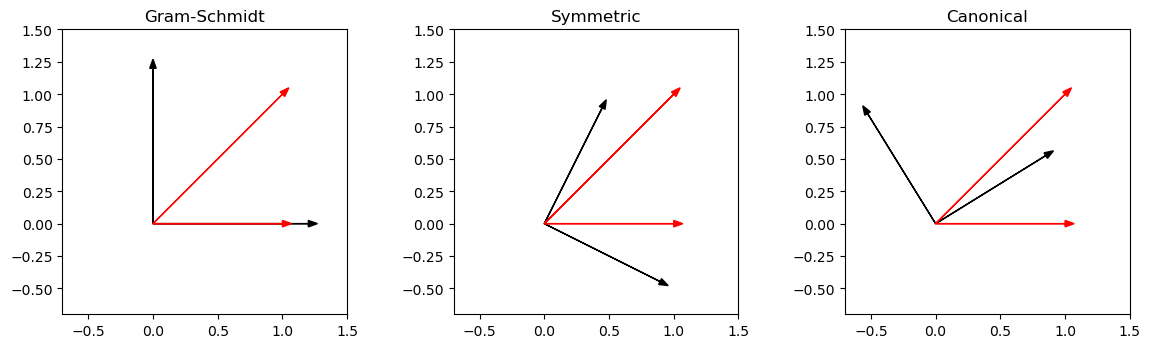

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gram_schmidt(vectors):
    basis = []
    for v in vectors:
        w = v - sum(np.dot(v, b)*b for b in basis)
        if (w > 1e-10).any():  # to avoid zero vectors
            basis.append(w/np.linalg.norm(w))
    return np.array(basis)

def symmetric_orthogonalization(vectors):
    S = np.array([[np.dot(vi, vj) for vj in vectors] for vi in vectors])
    eigvals, eigvecs = np.linalg.eigh(S)
    eigvals_matrix = np.diag(1.0 / np.sqrt(eigvals))
    transformation_matrix = eigvecs @ eigvals_matrix @ eigvecs.T
    return np.dot(transformation_matrix.T, vectors) # Apply transformation matrix

def canonical_orthogonalization(vectors):
    S = np.array([[np.dot(vi, vj) for vj in vectors] for vi in vectors])
    eigvals, eigvecs = np.linalg.eigh(S)
    transformation_matrix = eigvecs @ np.diag(1.0 / np.sqrt(eigvals))
    return np.dot(transformation_matrix.T, vectors) # Apply transformation matrix

def plot_vectors(arr1, arr2, arr3, arr4, ax, title):
    ax.arrow(0, 0, arr3[0], arr3[1], head_width=0.05, head_length=0.07, fc='black', ec='black')
    ax.arrow(0, 0, arr4[0], arr4[1], head_width=0.05, head_length=0.07, fc='black', ec='black')
    ax.arrow(0, 0, arr1[0], arr1[1], head_width=0.05, head_length=0.07, fc='r', ec='r')
    ax.arrow(0, 0, arr2[0], arr2[1], head_width=0.05, head_length=0.07, fc='r', ec='r')
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.set_xlim(-0.7,1.5)
    ax.set_ylim(-0.7,1.5)

fig, axs = plt.subplots(1, 3)
fig.tight_layout(pad=1.0)
fig.set_figheight(12)
fig.set_figwidth(12)
# Two non-orthogonal vectors
arr1 = np.array([1.0, 0.0, 0.0])
arr2 = np.array([1.0, 1.0, 0.0])
# Apply different orthogonalization procedures
arr3, arr4 = gram_schmidt([arr1, arr2]) * 1.2
arr5, arr6 = symmetric_orthogonalization([arr1, arr2])
arr7, arr8 = canonical_orthogonalization([arr1, arr2])
plot_vectors(arr1, arr2, arr3, arr4, axs[0], title='Gram-Schmidt')
plot_vectors(arr1, arr2, arr5, arr6, axs[1], title='Symmetric')
plot_vectors(arr1, arr2, arr7, arr8, axs[2], title='Canonical')
plt.show()

Above we see the three different approaches in action. In the Gram-Schmidt procedure, we choose one of the vectors to be the first basis vector. In higher dimensional case, we would proceed constructing the basis vector by vector, removing all the overlap from the set of vectors. In the symmetric procedure, the new orthogonal vectors most closely resemble the original vectors. The angle between the two vectors is opened up to 90 degrees. In the canonical procedure, one of the new vectors bisects the angle between the original vectors and the second vector is orthogonal to the first.